In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy 

In [2]:
# 1.1
m, eta = 1E-2, 0.2
kij = 1E5
cij = 2 * eta * np.sqrt(kij * m)
pts = np.array([[0, 0], [1, 0], [0.5, 1]])
edges = np.array([[0, 1], [1, 2], [0, 2]])
# length of the spring, cos(theta), sin(theta)
Kij = np.zeros((len(pts)*2, len(pts)*2))
Cij = np.zeros((len(pts)*2, len(pts)*2))
Mij = np.eye(len(pts)*2) * m
# Mij = np.zeros((len(pts)*2, len(pts)*2))
for p, q in edges:
    l = np.linalg.norm(pts[p] - pts[q])
    c = (pts[p, 0] - pts[q, 0]) / l
    s = (pts[p, 1] - pts[q, 1]) / l
    # print(f"l_{n} = {l:.2f}, c_{n} = {c:.2f}, s_{n} = {s:.2f}")
    A = np.array([  [c**2, c * s],
                    [c * s, s**2]])
#
    Kij[2*p:(2*p+2), 2*p:(2*p+2)] += +A * kij
    Kij[2*q:(2*q+2), 2*q:(2*q+2)] += +A * kij
    Kij[2*p:(2*p+2), 2*q:(2*q+2)] += -A * kij
    Kij[2*q:(2*q+2), 2*p:(2*p+2)] += -A * kij
#
    Cij[2*p:(2*p+2), 2*p:(2*p+2)] += +A * cij
    Cij[2*q:(2*q+2), 2*q:(2*q+2)] += +A * cij
    Cij[2*p:(2*p+2), 2*q:(2*q+2)] += -A * cij
    Cij[2*q:(2*q+2), 2*p:(2*p+2)] += -A * cij
    # Mij[2*n:(2*n+4), 2*n:(2*n+4)] = np.array([[1, 0, 0, 0],
    #                                             [0, 1, 0, 0],
    #                                             [0, 0, 1, 0],
    #                                             [0, 0, 0, 1]]) * m
# 
display(pd.DataFrame(Kij))
display(pd.DataFrame(Cij))
display(pd.DataFrame(Mij))

,0,1,2,3,4,5
0,120000.0,40000.0,-100000.0,0.0,-20000.0,-40000.0
1,40000.0,80000.0,0.0,0.0,-40000.0,-80000.0
2,-100000.0,0.0,120000.0,-40000.0,-20000.0,40000.0
3,0.0,0.0,-40000.0,80000.0,40000.0,-80000.0
4,-20000.0,-40000.0,-20000.0,40000.0,40000.0,0.0
5,-40000.0,-80000.0,40000.0,-80000.0,0.0,160000.0


,0,1,2,3,4,5
0,15.178933,5.059644,-12.649111,0.000000,-2.529822,-5.059644
1,5.059644,10.119289,0.000000,0.000000,-5.059644,-10.119289
2,-12.649111,0.000000,15.178933,-5.059644,-2.529822,5.059644
3,0.000000,0.000000,-5.059644,10.119289,5.059644,-10.119289
4,-2.529822,-5.059644,-2.529822,5.059644,5.059644,0.000000
5,-5.059644,-10.119289,5.059644,-10.119289,0.000000,20.238577


,0,1,2,3,4,5
0,0.01,0.00,0.00,0.00,0.00,0.00
1,0.00,0.01,0.00,0.00,0.00,0.00
2,0.00,0.00,0.01,0.00,0.00,0.00
3,0.00,0.00,0.00,0.01,0.00,0.00
4,0.00,0.00,0.00,0.00,0.01,0.00
5,0.00,0.00,0.00,0.00,0.00,0.01


In [3]:
node_state = [True] * len(pts) * 2
node_state[0] = False
node_state[1] = False
node_state[3] = False
Kff = Kij[node_state][:, node_state]

Cff = Cij[node_state][:, node_state]
Mff = Mij[node_state][:, node_state]
print(Kff)
print(Cff)
print(Mff)

[[120000. -20000.  40000.]
 [-20000.  40000.      0.]
 [ 40000.      0. 160000.]]
[[15.17893277 -2.52982213  5.05964426]
 [-2.52982213  5.05964426  0.        ]
 [ 5.05964426  0.         20.23857703]]
[[0.01 0.   0.  ]
 [0.   0.01 0.  ]
 [0.   0.   0.01]]


In [4]:
# y = np.array([[0, 0, np.nan, np.nan, np.nan, np.nan],
#               [0, 0, np.nan, np.nan, np.nan, np.nan]]).flatten()
# print(y)

In [5]:
# fixed_node = (y.reshape(2, -1)[0] == 0)
# print(fixed_node)
# free_node = ~fixed_node
# #
# Kff = Kij[free_node][:, free_node]
# Cff = Cij[free_node][:, free_node]
# Mff = Mij[free_node][:, free_node]
# #
# print(Kff)
# print(Cff)
# print(Mff)


In [6]:
Ft = np.zeros((len(pts)*2-3, ))
Ft[-2] = 1
print(Ft)

[0. 1. 0.]


In [7]:
def ode(t, y, K, C, M):
    #
    u = y.reshape(2, -1)[0]
    du = y.reshape(2, -1)[1]
    #
    ddu = np.linalg.solve(M, Ft-np.dot(C, du) - np.dot(K, u))
    
    return np.concatenate([du, ddu])


In [8]:
# 固定点抹去，只能求解力的响应，拼接方式和刚度矩阵一致

In [9]:
from scipy.integrate import solve_ivp
y0 = np.zeros((len(pts)*2*2-6))
sol = solve_ivp(lambda __t, __y: ode(__t, __y, Kff, Cff, Mff), [0, .1], y0=y0, t_eval=np.linspace(0, .1, 1000))

5.000603212373938e-06


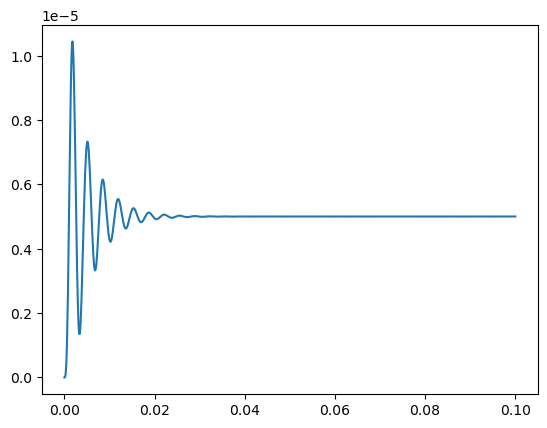

In [13]:
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y[0])
print(sol.y[0, -2])
# plt.plot(sol.t, sol.y[4])
plt.show()

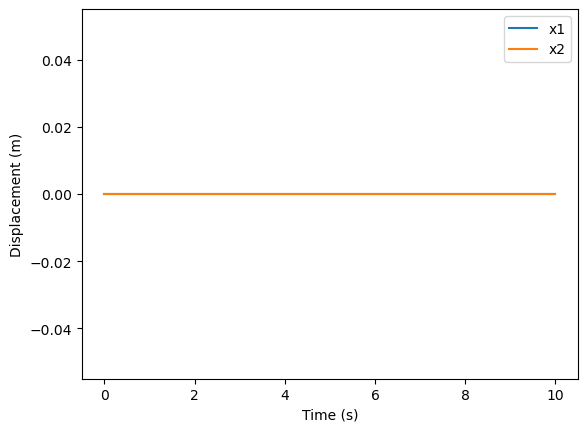

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

# 定义系统参数
M = np.diag([1, 1])  # 质量矩阵
K = np.diag([100, 100])  # 刚度矩阵
C = np.diag([10, 10])  # 阻尼矩阵
F = np.zeros((2, ))  # 外力向量

# 建立运动方程
A = np.block([[np.zeros((2, 2)), np.eye(2)], [-np.linalg.inv(M) @ K, -np.linalg.inv(M) @ C]])
B = np.block([[np.zeros((2, 2))], [np.linalg.inv(M)]])

# 求解运动方程
t = np.linspace(0, 10, 1000)  # 时间范围
x0 = np.zeros((4, ))  # 初始条件
X= scipy.integrate.odeint(lambda x, t: np.dot(A, x) + np.dot(B, F), x0, t, rtol=1e-6, atol=1e-8)

# 分析系统动力学
plt.plot(t, X[:, 0], label='x1')
plt.plot(t, X[:, 1], label='x2')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.show()

In [12]:
print(sol.y.shape)

(6, 1000)
